In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("drive/MyDrive/Colab Notebooks/data/uci-news-aggregator.csv")

In [ ]:
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [ ]:
df.columns

Index(['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME',
       'TIMESTAMP'],
      dtype='object')

In [16]:
df.CATEGORY.unique()

array(['b', 't', 'e', 'm'], dtype=object)

In [17]:
df.isna().sum()

ID           0
TITLE        0
URL          0
PUBLISHER    2
CATEGORY     0
STORY        0
HOSTNAME     0
TIMESTAMP    0
dtype: int64

In [18]:
from nltk.tokenize import word_tokenize

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ronsp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
data=df['TITLE'].map(word_tokenize).values

In [21]:
total_vocabulary = set(word.lower() for title in data for word in title)

In [22]:
len(data)

422419

In [23]:
len(total_vocabulary)

78592

In [24]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

In [88]:
target=df['CATEGORY']

In [89]:
y=pd.get_dummies(target).values

In [94]:
pd.get_dummies(target).head()

,b,e,m,t
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


This establishes our relationship: b corresponds to column 0, e to column 1, m to column 2, t to column 3

In [28]:
y[:10]

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]], dtype=uint8)

In [29]:
tokenizer = text.Tokenizer(num_words=20000)  # limit to the num_words most important ones
tokenizer.fit_on_texts(list(df['TITLE']))
tokenized_texts = tokenizer.texts_to_sequences(df['TITLE'])

In [30]:
X = sequence.pad_sequences(tokenized_texts, maxlen=100)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)

In [32]:
nn=Sequential()
nn.add(Embedding(len(total_vocabulary),128))
nn.add(LSTM(25,return_sequences=True))
nn.add(GlobalMaxPool1D())
nn.add(Dropout(0.5))
nn.add(Dense(100,activation='relu'))
nn.add(Dropout(0.5))
nn.add(Dense(100,activation='relu'))
nn.add(Dropout(0.5))
nn.add(Dense(100,activation='relu'))
nn.add(Dropout(0.5))
nn.add(Dense(4,activation='softmax'))

In [33]:
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         10059776  
                                                                 
 lstm (LSTM)                 (None, None, 25)          15400     
                                                                 
 global_max_pooling1d (Globa  (None, 25)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense (Dense)               (None, 100)               2600      
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                      

In [34]:
nn.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [35]:
history=nn.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
8911/8911 [==============================] - 1018s 114ms/step - loss: 0.3631 - accuracy: 0.8786 - val_loss: 0.1976 - val_accuracy: 0.9333
Epoch 2/20
8911/8911 [==============================] - 1052s 118ms/step - loss: 0.2015 - accuracy: 0.9377 - val_loss: 0.1783 - val_accuracy: 0.9425
Epoch 3/20
8911/8911 [==============================] - 963s 108ms/step - loss: 0.1690 - accuracy: 0.9468 - val_loss: 0.1687 - val_accuracy: 0.9447
Epoch 4/20
8911/8911 [==============================] - 955s 107ms/step - loss: 0.1502 - accuracy: 0.9521 - val_loss: 0.1710 - val_accuracy: 0.9447
Epoch 5/20
8911/8911 [==============================] - 953s 107ms/step - loss: 0.1372 - accuracy: 0.9560 - val_loss: 0.1771 - val_accuracy: 0.9440
Epoch 6/20
8911/8911 [==============================] - 950s 107ms/step - loss: 0.1267 - accuracy: 0.9587 - val_loss: 0.1690 - val_accuracy: 0.9446
Epoch 7/20
8911/8911 [==============================] - 971s 109ms/step - loss: 0.1202 - accuracy: 0.9606 - va

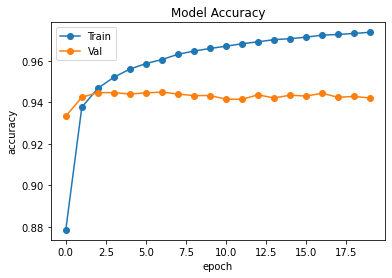

In [99]:
plt.plot(history.history['accuracy'],marker='o')
plt.plot(history.history['val_accuracy'],marker='o')
plt.legend(["Train","Val"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Model Accuracy")
plt.show()

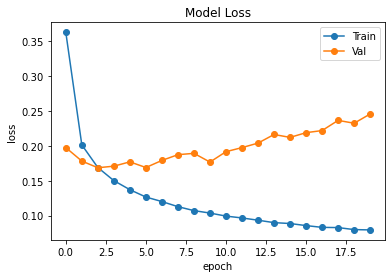

In [100]:
plt.plot(history.history['loss'],marker='o')
plt.plot(history.history['val_loss'],marker='o')
plt.legend(["Train","Val"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Model Loss")
plt.show()

In [36]:
nn.evaluate(X_test,y_test)

3301/3301 [==============================] - 23s 7ms/step - loss: 0.2372 - accuracy: 0.9429


[0.2372174710035324, 0.9428909420967102]

We look to get an accuracy of 94.29% on a held out test set. We can get the actual predictions and compare to the test data to see more clearly how we did.

In [68]:
pred=nn.predict(X_test)

To get this in a good way to visualize the results, we need to turn both this prediction and our test data labels into a single integer response for each instance

In [79]:
y_pred=[]

In [80]:
for p in pred:
    y_pred.append(np.argmax(p))

In [82]:
y_test1=[]
for y in y_test:
    for i in range(len(y)):
        if y[i]==1:
            y_test1.append(i)

In [85]:
print(confusion_matrix(y_test1,y_pred))

[[27123   470   309  1213]
 [  421 36951   178   475]
 [  392   230 10538   197]
 [ 1654   353   139 24962]]


In [86]:
print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     29115
           1       0.97      0.97      0.97     38025
           2       0.94      0.93      0.94     11357
           3       0.93      0.92      0.93     27108

    accuracy                           0.94    105605
   macro avg       0.94      0.94      0.94    105605
weighted avg       0.94      0.94      0.94    105605



We can see that overall the accuracy is as described. The 0 and 3 class were the most easily confused.These were labels of 'b' and 't' which are "Business" and "Science and Technology" which could easily overlap at times.